STEPWISE METHODS
-------------------------------

### Forward selection method 

Le principe de la sélection "forward" est d’ajouter, à chaque itération, le facteur qui
maximise le critère. L’ensemble $S^*$ est initialisé avec l’ensemble minimal $S_0$ . A chaque étape de l’algorithme,
l’ensemble $S^*$ est mis à jour par insertion d’une nouvelle variable i. A la fin de l’algorithme, l’ensemble $S^*$
contient les variables qui font partie de la sélection

In [ ]:
#/* Build a linear model using stepwise regression with "forward" search method */
LinearModelResult LinearModelStepwiseFactory::buildForward(const Indices & minimalIndices,
                                                           const NumericalScalar k,
                                                           const UnsignedInteger itermax)
{
  return build(minimalIndices, minimalIndices, true, false, k, itermax);
}

### Backward selection method 

Le principe de la sélection “backward” est d’enlever à chaque itération un facteur
pour augmenter un des critères précédents. Le facteur retiré est celui qui maximise cette augmentation.

In [ ]:
#/* Build a linear model using stepwise regression with "backward" search method */
LinearModelResult LinearModelStepwiseFactory::buildBackward(const Indices & minimalIndices,
                                                            const NumericalScalar k,
                                                            const UnsignedInteger itermax)
{
  Indices startIndices(monomials_.getSize());
  startIndices.fill();
  return build(minimalIndices, startIndices, false, true, k, itermax);
}

### Both selection method 

Le principe de la sélection “both” est d’enlever ou de rajouter un facteur à chaque itération.

In [ ]:
#/* Build a linear model using stepwise regression with "both" search method */
LinearModelResult LinearModelStepwiseFactory::buildBoth(const Indices & minimalIndices,
                                                        const Indices & startIndices,
                                                        const NumericalScalar k,
                                                        const UnsignedInteger itermax)
{
  return build(minimalIndices, startIndices, true, true, k, itermax);
}


### Build method 

In [ ]:
#/* Build a linear model using stepwise regression */
LinearModelResult LinearModelStepwiseFactory::build(const Indices & minimalIndices,
                                                    const Indices & startIndices,
                                                    const Bool forward,
                                                    const Bool backward,
                                                    const NumericalScalar k,
                                                    const UnsignedInteger itermax)
{
  #/* k : the multiple of the degrees of freedom used for the penality
  #      - k=2      Akaike   information criterion (AIC)
  #      - k=log(n) Bayesian information criterion (BIC)  */
  throw NotYetImplementedException(HERE);
}

0 : $\text{Entrées : } S_{min}=\color{blue}{\text{minimalIndices }},  
                       S_0=\color{blue}{\text{startIndices }},
                       S_{max}$

1 : $\text{Sortie : }S^∗$

2 : $\text{Initialisation : } S^∗ = S_0 \quad, \quad n_{iter} = 0$

3 : ${\bf\text{Tant que } n_{iter} < \color{blue}{itermax} \quad\text{faire} :}$

4 : $ \quad \quad  X = (x^k)_{k \in S^*} $

5 : $\quad \quad \color{blue}{\text{currentGramInverse_} = (X^T X)^{-1}} \quad,\quad  \color{blue}{\text{currentB_} =  (X^T X)^{-1} X^T} $

6 : $\quad \quad \text{On estime } \quad L^∗ = L_{S^∗}$
$\hat{=} \log L(\hat{\beta},\hat{\sigma}\mid Y) \quad \text{ avec }  \color{blue}{\text{ computeLogLikelihood()}}
$

7 : $\quad\quad L^i = -\infty \quad,\quad L^{i'} = -\infty $

8: $\quad\quad {\bf\text{Si}\quad \color{blue}{forward} \quad \text{Faire} :}$

9: $\quad\quad\quad\quad$
   ${\bf\text{Pour } j \in S_{max} \backslash S^*  \quad \text{Faire} :}$

10 : $\quad \quad \quad \quad \quad \quad \text{On estime }\quad L_{S^* \,\cup \, j}$
$\hat{=} \log L(\hat{\beta}_+,\hat{\sigma}_+\mid Y)\quad \text{ avec }  \color{blue}{\text{ computeLogLikelihoodForward(j)}}$

11 : $\quad\quad\quad\quad\quad\quad$
     $L^i = \max(L^i , L_{S^∗ \,\cup \,  j})$

12 : $\quad\quad$
     ${\bf\text{Si}\quad \color{blue}{backward} \quad \text{Faire} :}$

13 : $\quad\quad\quad\quad$
     ${\bf\text{Pour } j \in S^*\backslash S_{min} \quad \text{Faire} :}$

14 : $\quad \quad \quad \quad \quad \quad \text{On estime }\quad L_{S^* \,\backslash\, j}$
$\hat{=} \log L(\hat{\beta}_{-j},\hat{\sigma}_{-j}\mid Y)
\quad \text{ avec }  \color{blue}{\text{ computeLogLikelihoodBackward(j)}}$

15 : $\quad\quad\quad\quad\quad\quad$
     $L^{i'} = \max(L^{i'}, L_{S^∗ \,\backslash \,  j})$

16 : $\quad\quad$
     ${\bf\text{Si}\quad (L^i\color{blue}{+k\, \# (S^∗\,\cup \, i)} > L^∗\color{blue}{+k\, \# S^∗} ) \quad \text{ou} \quad (L^{i'}\color{blue}{+k\, \# (S^∗\,\backslash \, i)} > L^∗\color{blue}{+k\, \# S^∗}) \quad  \text{Faire} :}$
     
16 : $\quad\quad$
     ${\bf\text{Si}\quad (L^i\color{blue}{+k} > L^∗) \quad \text{ou} \quad (L^{i'}\color{blue}{-k} > L^∗) \quad  \text{Faire} :}$

17 : $\quad\quad\quad\quad$
     ${\bf\text{Si}\quad (L^i\color{blue}{+k}) > (L^{i'}\color{blue}{-k})\quad \text{Faire} :}$
    
18 : $\quad\quad\quad\quad\quad\quad S^∗ =S^∗ \,\cup \,  i$

19 : $\quad\quad\quad\quad$
     ${\bf\text{Sinon Faire} :}$
         
20 : $\quad\quad\quad\quad\quad\quad S^∗ =S^∗ \,\backslash \,  i'$     
     
21 : $\quad \quad{\bf\text{ Sinon Faire :}}$

22 : $\quad \quad \quad \quad \text{Quitter}$

23 : $\quad \quad n_{iter} = n_{iter} + 1$


## LogLikeLihood fonction

La fonction log-vraisemblance est donnée par :

$$\log L(\beta,\sigma\mid Y)= -\frac{n}{2}\big(\log(2\pi)+ \log(\sigma^2)\big)- \frac{1}{\sigma^2}\big(Y-X\beta\big)^T\,\big(Y-X\beta\big)$$

Le maximum de la fonction log-vraisamblance est atteint pour :

 $$\hat{\beta}=(X^T X)^{-1} \,X^T\,Y \quad,\quad \hat{\sigma}^2 = \frac{1}{n}\big(Y-X\hat{\beta}\big)^T\,\big(Y-X\hat{\beta}\big)$$

Pour ces valeurs on obtient alors :

$$\log L(\hat{\beta},\hat{\sigma}\mid Y)= -\frac{n}{2}\big(\log(2\pi)+ \log(\hat{\sigma}^2)\big)- \underbrace{\frac{1}{\hat{\sigma}^2}\big(Y-X\hat{\beta}\big)^T\,\big(Y-X\hat{\beta}\big)}_{\frac{n}{2}}=-\frac{n}{2}\big(\log(2\pi)+ \log(\hat{\sigma}^2)+1\big) $$

## computeLogLikelihoodForward

Soit $x_+$ la colonne à ajouter et $X_+ = (X \,,\,x_+)$ la matrice $X$ augmentée d’une colonne et soit la matrice de projection :
$$H_+\, \,\hat{=}\, X_{+}\,\big(X^T_{+} \,X_{+}\big)^{-1} \,X^T_{+} $$
La fonction log-vraisemblance pour la sélection “forward”  donne:

$$\boxed{\log L(\hat{\beta}_+,\hat{\sigma}_+\mid Y) =-\frac{n}{2}\big(\log(2\pi)+ \log(\hat{\sigma}_+^2)+1\big)} $$
avec 
$$ \boxed{\hat{\sigma}_+^2  = \frac{1}{n}\big(Y-H_+\,Y\big)^T\,\big(Y-H_+\,Y \big)} $$

### calcul du vecteur de taille $(n)$  : $ H_{+}\,Y$ :

On définie $A$ la matrice de taille $(p+1\times p+1)$ par :
$$A \hat{=}(X^T X)^{-1} $$ 
On définie $B$ la matrice de taille $(p+1 \times n)$ par :
$$ B=A\,X^T $$
On définie $D$ la matrice de taille $(p+1\times 1)$ par :
$$D=B\,x_+  $$ 
On définie $C$ la matrice de taille $(1 \times 1)$ par :
$$C= x_+^T x_+ -x_+^T X D $$

Le calcul de de la matrice projection $(n\times n)\,:\,$ $H_+$ est donné par :
$$H_{+} \,\hat{=}\, X_{+}\,\big(X^T_{+} \,X_{+}\big)^{-1} \,X^T_{+}  = 
 X\,\big(A + \frac{D\,D^T}{C}\big) \,X^T - \frac{X\,D\,x_+^T}{C} - \frac{x_+\,D^T\,X^T}{C} + \frac{x_+\,x_+^T}{C}  $$


Le calcul de $H_+$ en fonction de la matrice $A$ est donné par :
$$H_{+} = X\,A \, X^T  + \frac{X\,A \, X^T\,x_+\,(X\,A \, X^T\,x_+)^T}{C} - \frac{X\,A \, X^T\,x\,x_+^T}{C} - \frac{x_+\,x_+^T \, X\,A \, X^T}{C} + \frac{x_+\,x_+^T}{C}  $$
$$H_{+}=  X\,A \, X^T + \frac{1}{(x_+^T x_+ -x_+^T \,X\,A \, X^T\, x_+)} \big(\,X\,A \, X^T\,x_+\,x_+^T\,X\,A \, X^T \,-\,X\,A \, X^T\,x\,x_+^T \,-\,x_+\,x_+^T \, X\,A \, X^T\,+\,x_+\,x_+^T \,\big) $$

D'après la formultion précédente de $H_+$ on obtient : 

$$ \boxed{H_{+}\,Y = X\,A \, X^T\,Y +\frac{1}{(x_+^T x_+ -x_+^T \,X\,A \, X^T\, x_+)}
\big(\,X\,A \, X^T\,x_+\,\underbrace{x_+^T\,X\,A \, X^T\,Y}_{\in \mathbb{R}} \,-\,X\,A \, X^T\,x_+\,\underbrace{x_+^T\,Y}_{\in \mathbb{R}} \,-\,x_+\,\underbrace{x_+^T \, X\,A \, X^T\,Y}_{\in \mathbb{R}}\,+\,x_+\,\underbrace{x_+^T\,Y}_{\in \mathbb{R}} \,\big)}$$

## computeLogLikelihoodForward : Algorithme

on calcul la matrice de taille $(n\times p):\,M= X\,A $ 

on calcul le vecteur de taille $(p) : \, b=X^T\,Y $

on calcul le vecteur de taille $(n)$ : $\,\hat{Y}=M \,b $  

${\bf\text{Pour } j \in S_{max} \backslash S^*  \quad \text{Faire} :}$

$\quad\quad \text{on calcul le vecteur de taille } (p):  b_+=X^T\,x_+ $

$\quad\quad \text{on calcul le vecteur de taille } (n):  d_+=M\,b_+ $

$ \quad\quad \text{on calcul le vecteur de taille } (n):  \boxed{ H_{+}\,Y = \hat{Y} +\frac{x_+^T\,(Y -\hat{Y})}{x_+^T\,(x_+ -d_+)} \big(x_+ -d_+\big) }$

## computeLogLikelihoodBackward

Soit $X_{−i}$ la matrice $X$ sans la colonne $i$ et soit la matrice de projection :
$$H_{-i}\, \,\hat{=}\, X_{-i}\,\big(X^T_{-i} \,X_{-i}\big)^{-1} \,X^T_{-i} $$
La fonction log-vraisemblance pour la sélection “backward”  donne:

$$\boxed{\log L(\hat{\beta}_{-i},\hat{\sigma}_{-i}\mid Y) =-\frac{n}{2}\big(\log(2\pi)+ \log(\hat{\sigma}_{-i}^2)+1\big)} $$
avec
$$ \boxed{ \hat{\sigma}_{-i}^2 = \frac{1}{n}\big(Y-H_{-i}\,Y\big)^T\,\big(Y-H_{-i}\,Y \big) }$$ 

### calcul du vecteur de taille $(n)$: $ H_{-i}\,Y$ :

On définie $A$ la matrice de taille $(p+1\times p+1)$ par :
$$A \hat{=}(X^T X)^{-1} $$ 

Le calcul de de la matrice projection $(n\times n)\,:\,$ $H_{-i}$ est donné par :
$$H_{−i} \,\hat{=}\, X_{−i}\,(X^T_{−i} \,X_{−i})^{-1} \,X^T_{−i}  = X_{−i}\,A_{−i,-i} \, X^T_{−i} \,-\,\frac {1}{A_{i,i}}\,\big(X_{−i}\, A_{−i,i}\big)\, \big(X_{−i}\, A_{−i,i}\big)^T $$


où $A_{−i,−i}$ est la matrice $A$ sans la ligne $i$ ni la colonne $i$, $A_{−i,i}$ est la matrice $A$ sans la ligne $i$ et avec seulement la colonne $i$ et $A_{i,i}$ est le terme $i$ de la diagonale de $A$.

Soit $X_{i=0}$ la matrice $X$ avec la colonne $i$ mise à $0$, et $A_{,i}$ la colonne $i$ de la matrice $A$, on obtient :
$$H_{−i} \,\hat{=}\,X_{i=0}\,A\,X_{i=0}^T \,-\,\frac {1}{A_{i,i}}\,  \big(X_{i=0}\,A_{,i}\big) \big(X_{i=0}\,A_{,i}\big)^T   $$


D'après la formultion précédente de $H_{-i}$ on obtient : 

$$\boxed{ H_{-i}\,Y = 
\,X_{i=0}\,A\,\underbrace{X_{i=0}^T\,Y}_{\in \mathbb{R}^p} \,-\,\frac {1}{A_{i,i}}\,  \big(X_{i=0}\,A_{,i}\,\underbrace{A_{i,} X_{i=0}^T\,Y}_{\in \mathbb{R}}\,\big)  }$$


## computeLogLikelihoodBackward : Algorithme

On note $\big[b\big]_{j=0}$  le vecteur $b$ avec la ligne $j$ mise à $0$. 

on calcul le vecteur de taille $(p) : \, b=X^T\,Y $.

${\bf\text{Pour } j \in S^*\backslash S_{min} \quad \text{Faire} :}$

$\quad\quad \text{on calcul le vecteur de taille } (n):  d_{j} =\,X\,\big[A_{,j}\big]_{j=0} \,$

$\quad\quad \text{on calcul le vecteur de taille } (p):  e_{j} =\,A\,\big[b\big]_{j=0} \,$

$ \quad\quad \text{on calcul le vecteur de taille } (n):  \boxed{ H_{-j}\,Y = 
\,X\, \big[e_{j}\big]_{j=0} \,-\,\frac {{(e_{j}})_j}{A_{j,j}}\,  \big[d_{j}\big]_{j=0}   }$

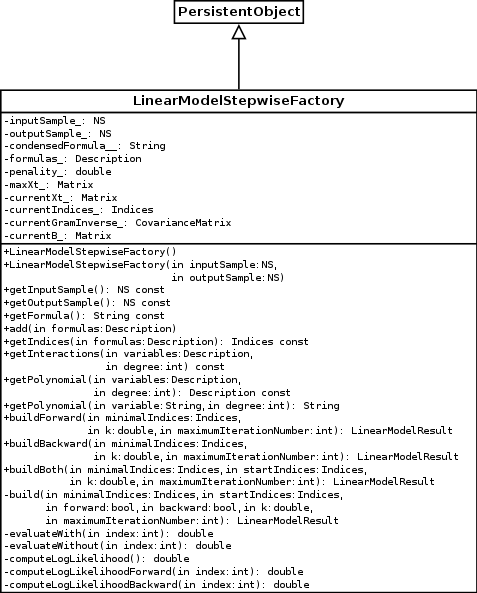

In [6]:
from IPython.display import Image
Image(filename='LinearModelStepwiseFactory.png')

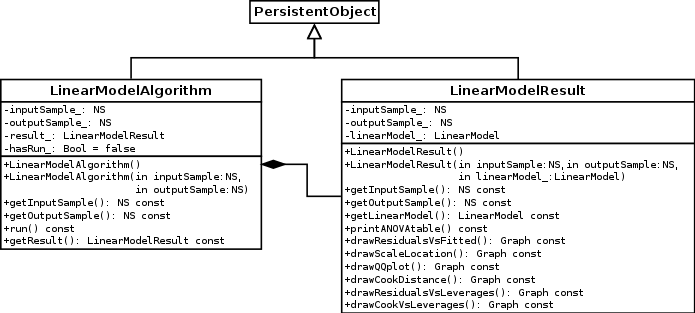

In [3]:
Image(filename='LinearModelAlgorithm.png')